In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - slack parameter study - 60 Nodes

In [2]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_6\\data_spd_2_n_60_p_900_pdf.csv')

In [3]:
df.head()

,run,PauseTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-B-81-20220108-21:52...,900,21,TARPNetwork.node[17].app[0],NaN,NaN,868.0,868000.0,868.0,900.0,900.0,900000.0
1,RandomWaypointMobility-SPD-B-70-20220108-21:45...,900,10,TARPNetwork.node[17].app[0],NaN,NaN,781.0,781000.0,781.0,900.0,900.0,900000.0
2,RandomWaypointMobility-SPD-B-60-20220108-21:40...,900,0,TARPNetwork.node[22].app[0],875.0,875000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomWaypointMobility-SPD-B-60-20220108-21:40...,900,0,TARPNetwork.node[17].app[0],NaN,NaN,78.0,78000.0,78.0,900.0,900.0,900000.0
4,RandomWaypointMobility-SPD-B-70-20220108-21:45...,900,10,TARPNetwork.node[22].app[0],826.0,826000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [5]:
df = df.sort_values(by=['repetition'])

In [6]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [7]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [8]:
print (results)   

[0.5369, 0.8908, 0.5564, 0.9767, 0.571, 0.9861, 0.9983, 0.562, 0.5503, 0.9501, 0.9311, 0.4864, 0.9493, 0.9444, 0.5528, 0.9651, 0.9537, 0.9939, 0.5937, 0.5069, 0.9906, 0.9822, 0.9733, 0.9612, 0.5297, 0.9826, 0.9683, 0.9905, 0.5431, 0.9712]


In [9]:
print (results_x) 

[0.9722, 0.8211, 0.9989, 0.9989, 0.9944, 0.9933, 0.9989, 0.9989, 0.9989, 0.9133, 0.9178, 0.8344, 0.9722, 0.9989, 0.9678, 0.9422, 0.92, 0.9944, 0.9856, 0.9989, 0.9989, 0.9944, 0.9956, 0.9467, 0.9989, 0.9811, 0.9989, 0.9967, 0.9989, 0.9656]


In [10]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 81.16


In [11]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 96.99


In [12]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[98.17, 96.41, 95.8, 96.56, 93.03, 95.88, 98.27, 99.33]})

dd_x_errors = [0.591, 1.02, 1.35, 1.18, 2.21, 2.85, 0.948, 0.583]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[74.77, 71.46, 68.33, 72.6, 66.8, 80.9, 88.88, 94.6]})

spd_1_x_errors = [2.74, 2.49, 3.28, 2.33, 3.58, 3.2, 2.13, 2.32]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[86.44, 81.91, 80.59, 85.38, 77.67, 88.27, 92.86, 96.99]})

spd_2_x_errors = [2.05, 2.15, 2.76, 1.98, 3.66, 2.93, 1.99, 1.65]

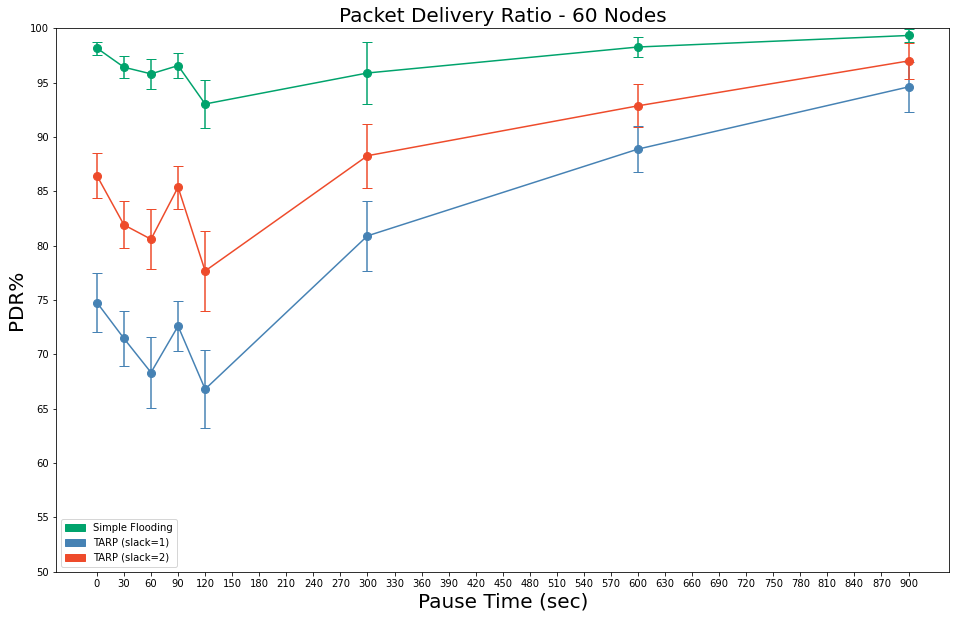

In [14]:
plt.xlabel("Pause Time (sec)", fontsize=20)
plt.ylabel("PDR%", fontsize=20)
plt.title("Packet Delivery Ratio - 60 Nodes", fontsize=20)

plt.xticks(np.arange(0,901, 30), fontsize=10)
plt.yticks(np.arange(0,101, 5), fontsize=10)
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([50, 100])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.PDF, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='#00A36C', 
  markersize=8, 
  linewidth=1.5, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.PDF, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='#4682B4', 
  markersize=8, 
  linewidth=1.5, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.PDF, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='#EE4B2B', 
  markersize=8, 
  linewidth=1.5, 
  linestyle='-')

red_patch = mpatches.Patch(color='#EE4B2B', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='#00A36C', label='Simple Flooding')
blue_patch = mpatches.Patch(color='#4682B4', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-60-new-1.png', dpi=300)

In [15]:
df_tarp_1 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_11\\data_spd_1_n_60_p_900_dpf.csv')
df_tarp_2 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_11\\data_spd_2_n_60_p_900_dpf.csv')
df_sp = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_11\\data_dd_n_60_p_900_dpf.csv')

In [19]:
df_tarp_1.Module = df_tarp_1.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]
df_tarp_2.Module = df_tarp_2.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]
df_sp.Module = df_sp.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [20]:
# Calculate the average
tarp_1_mean = np.mean(df_tarp_1.nbDataPacketsForwarded)
tarp_2_mean = np.mean(df_tarp_2.nbDataPacketsForwarded)
sp_mean = np.mean(df_sp.nbDataPacketsForwarded)

# Calculate the standard deviation
tarp_1_std = np.std(df_tarp_1.nbDataPacketsForwarded)
tarp_2_std = np.std(df_tarp_2.nbDataPacketsForwarded)
sp_std = np.std(df_sp.nbDataPacketsForwarded)

In [21]:
# Create lists for the plot
protocols = [ "Simple Flooding", 'TARP (slack=2)', 'TARP (slack=1)']
x_pos = np.arange(len(protocols))
CTEs = [sp_mean, tarp_2_mean, tarp_1_mean]
error = [sp_std, tarp_2_std, tarp_1_std]

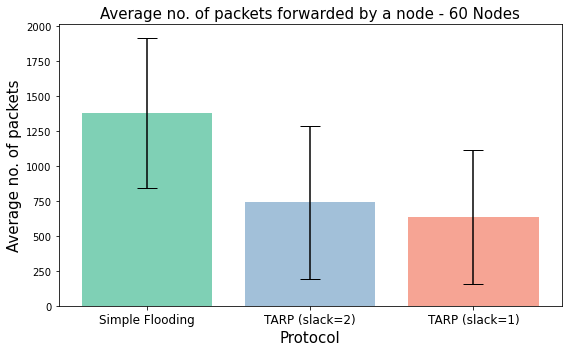

In [50]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=['#00A36C', '#4682B4', '#EE4B2B'])
ax.set_ylabel('Average no. of packets', fontsize=15)
ax.set_xticks(x_pos)
plt.xlabel("Protocol", fontsize=15)
ax.set_xticklabels(protocols, fontsize=12)
ax.set_title('Average no. of packets forwarded by a node - 60 Nodes', fontsize=15)
ax.yaxis.grid(False)

fig.set_size_inches(8, 5)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png', dpi=300)
plt.show()